# Mmke_code_runnable and make CannonicalCode

## Run the code with the TaskId.

In [ ]:
from CodeClient import *
from make_code_runnable import *
from plot_log import *

import os

def MakeCannonicalCode():
# TaskId文件路径
    file_path = r'/Users/yin/Documents/GitHub/MCCodeLog/TaskId.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
            task_info = file.read().strip()  # 读取文件内容并去除首尾空白字符

    # Only for making CanonicalCode.
    llm_name = 'CanonicalCode'

    folder_path = r'/Users/yin/Documents/GitHub/MCCodeLog'
    os.makedirs(folder_path, exist_ok=True)

    code_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}.py")

    try:
        with open(code_file_path, 'r', encoding='utf-8') as file:
            CannonicalCode = file.read()
            print("File content successfully read and assigned to CannonicalCode.")
    except FileNotFoundError:
        print(f"File not found: {code_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    # Get python code from the output of LLM
    msgCode = CannonicalCode
    RunnableCode = make_code_runnable(msgCode, llm_name, task_info)
    print(RunnableCode)

    # Run Code in WMX3
    SendCode(RunnableCode)
    

    folder_path = r'/Users/yin/Documents/GitHub/MCCodeLog'
    os.makedirs(folder_path, exist_ok=True)

    log_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}_log.txt")
    plot_log(log_file_path)


 
MakeCannonicalCode()   
    

## Run the code with TaskId in the file or in turn.

Processing tasks:   0%|          | 0/1 [00:00<?, ?it/s]

Current Task ID: 3
3_CanonicalCode.py successfully read.
codedata:
Program begin.
Program End.
Elapsed_time: 3.274
----------------------



Processing tasks: 100%|██████████| 1/1 [00:05<00:00,  5.31s/it]

# -------------------------------------------------------------------------

Total tasks: 1
Successfully completed: 1
Errors encountered: 0
Syntax errors encountered: 0


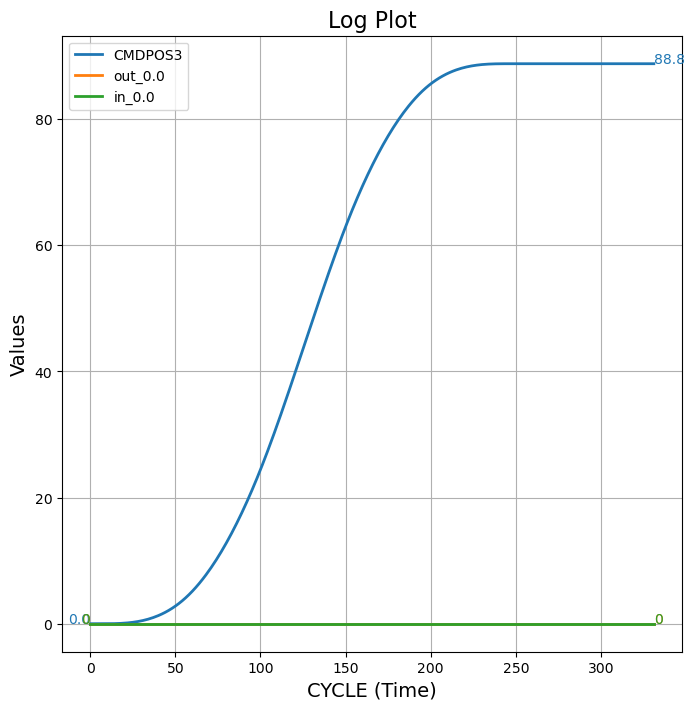

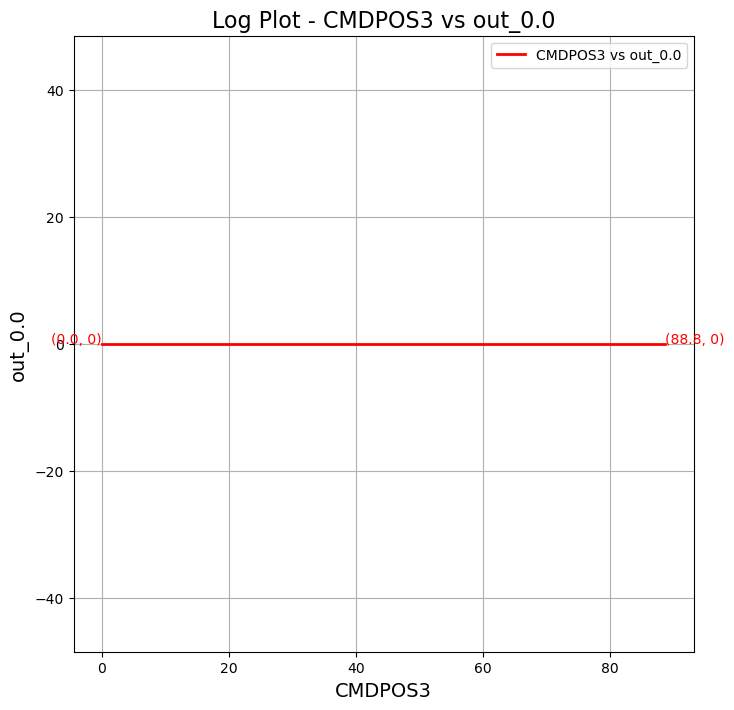

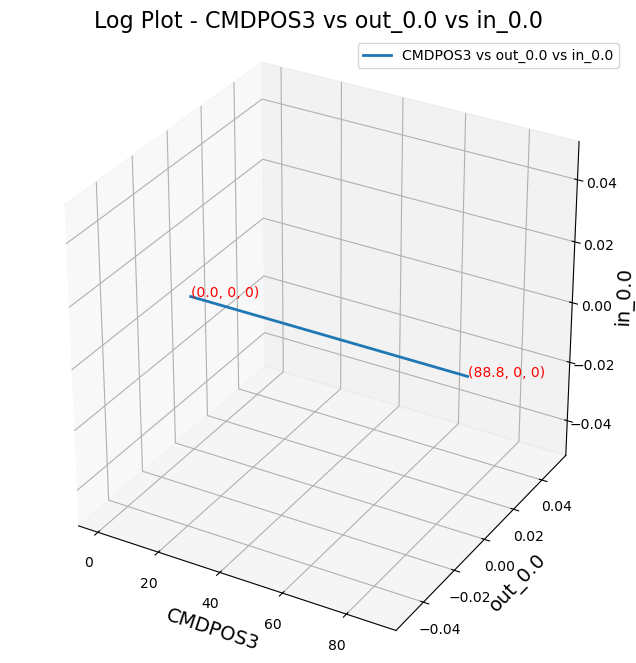

In [2]:
from CodeClient import *
from make_code_runnable import *
from plot_log import *
from tqdm import tqdm
import os

def MakeCannonicalCode(read_from_file=1):
    """
    Execute canonical code based on task_info from a file or iterate from 0 to 105.
    """
    if read_from_file == 1:
        # TaskId文件路径
        file_path = r'/Users/yin/Documents/GitHub/MCCodeLog/TaskId.txt'
        with open(file_path, 'r', encoding='utf-8') as file:
            task_info = file.read().strip()  # 读取文件内容并去除首尾空白字符
        task_infos = [task_info]
    else:
        task_infos = range(83, 106)   # Code files range for running

    llm_name = 'CanonicalCode'
    folder_path = f'/Users/yin/Documents/GitHub/MCCodeLog/{llm_name}'
    os.makedirs(folder_path, exist_ok=True)

    total_tasks = len(task_infos)
    success_count = 0
    error_count = 0
    syntax_error_count = 0
    error_task_ids = []
    syntax_error_task_ids = []

    for task_info in tqdm(task_infos, desc="Processing tasks"):
        print(f"Current Task ID: {task_info}")
        code_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}.py")

        try:
            with open(code_file_path, 'r', encoding='utf-8') as file:
                CannonicalCode = file.read()
                print(f"{task_info}_{llm_name}.py" + " successfully read.")
        except FileNotFoundError:
            print(f"File not found: {code_file_path}")
            error_count += 1
            error_task_ids.append(task_info)
            continue
        except Exception as e:
            print(f"An error occurred while reading the file: {e}")
            error_count += 1
            error_task_ids.append(task_info)
            continue

        # Get python code from the output of LLM
        msgCode = CannonicalCode
        RunnableCode = make_code_runnable(msgCode, llm_name, task_info)
        # print(RunnableCode)

        # Run Code in WMX3
        CodeResult = SendCode(RunnableCode)
        # print(CodeResult)

        # Check for errors in the response
        if "error" in CodeResult:
            error_count += 1
            if "syntax error" in CodeResult:
                syntax_error_count += 1
                syntax_error_task_ids.append(task_info)
            else:
                error_task_ids.append(task_info)
        else:
            success_count += 1

        log_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}_log.txt")
        plot_log(log_file_path)
        print('# -------------------------------------------------------------------------\n')

    print(f"Total tasks: {total_tasks}")
    print(f"Successfully completed: {success_count}")
    print(f"Errors encountered: {error_count}")
    print(f"Syntax errors encountered: {syntax_error_count}")
    if error_task_ids:
        print(f"Task IDs with errors: {error_task_ids}")
    if syntax_error_task_ids:
        print(f"Task IDs with syntax errors: {syntax_error_task_ids}")

MakeCannonicalCode(read_from_file=1)
